In [2]:
import os
import pandas as pd

print(os.getcwd())

os.chdir('C:\\Users\\Ana Valls\\Desktop\\CURSO BIG DATA\\IBM\\Python For Data Science\\Proyecto 3')  

df = pd.read_csv('calificaciones.csv')

print("Primeras filas del DataFrame:")
print(df.head())


c:\Users\Ana Valls\Desktop\CURSO BIG DATA\IBM\Python For Data Science\Proyecto 3
Primeras filas del DataFrame:
        Fecha Estudiante  Matemáticas  Ciencias  Historia  Inglés
0  2023-01-01       Juan           85        90        78      92
1  2023-01-01        Ana           88        84        82      95
2  2023-01-01      Pedro           76        85        80      89
3  2023-01-01      María           90        93        88      97
4  2023-01-02       Juan           82        88        75      91


In [3]:
df['Fecha'] = pd.to_datetime(df['Fecha'])  
df.dropna() 

df['Promedio'] = df[['Matemáticas', 'Ciencias', 'Historia', 'Inglés']].mean(axis=1)

print("\nInformación del DataFrame:")
print(df.info())


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        8 non-null      datetime64[ns]
 1   Estudiante   8 non-null      object        
 2   Matemáticas  8 non-null      int64         
 3   Ciencias     8 non-null      int64         
 4   Historia     8 non-null      int64         
 5   Inglés       8 non-null      int64         
 6   Promedio     8 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 580.0+ bytes
None


In [4]:
print("\nResumen estadístico:")
print(df.describe())



Resumen estadístico:
                     Fecha  Matemáticas   Ciencias   Historia     Inglés  \
count                    8     8.000000   8.000000   8.000000   8.000000   
mean   2023-01-01 12:00:00    85.125000  87.500000  80.875000  93.000000   
min    2023-01-01 00:00:00    76.000000  83.000000  75.000000  88.000000   
25%    2023-01-01 00:00:00    81.000000  84.750000  78.750000  90.500000   
50%    2023-01-01 12:00:00    86.500000  87.000000  80.000000  93.000000   
75%    2023-01-02 00:00:00    90.000000  90.250000  82.750000  95.500000   
max    2023-01-02 00:00:00    92.000000  93.000000  88.000000  98.000000   
std                    NaN     5.938675   3.585686   4.086126   3.625308   

        Promedio  
count   8.000000  
mean   86.625000  
min    82.000000  
25%    83.625000  
50%    86.750000  
75%    88.500000  
max    92.000000  
std     3.765444  


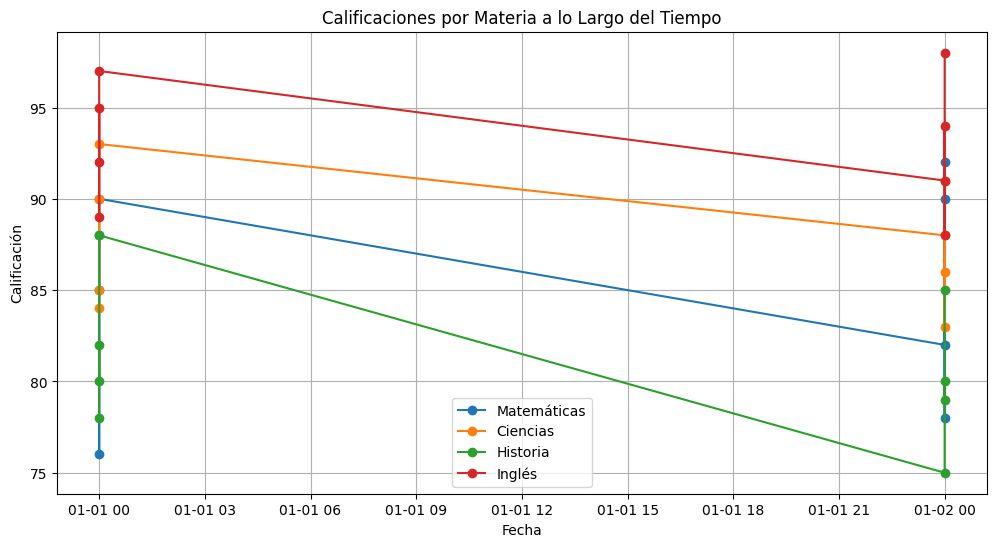

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for subject in ['Matemáticas', 'Ciencias', 'Historia', 'Inglés']:
    plt.plot(df['Fecha'], df[subject], marker='o', linestyle='-', label=subject)
plt.xlabel('Fecha')
plt.ylabel('Calificación')
plt.title('Calificaciones por Materia a lo Largo del Tiempo')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
promedio_materias = df[['Matemáticas', 'Ciencias', 'Historia', 'Inglés']].mean()

C:\Users\Ana Valls\AppData\Local\Temp\ipykernel_18556\1520622556.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_materias.index, y=promedio_materias.values, palette='viridis')


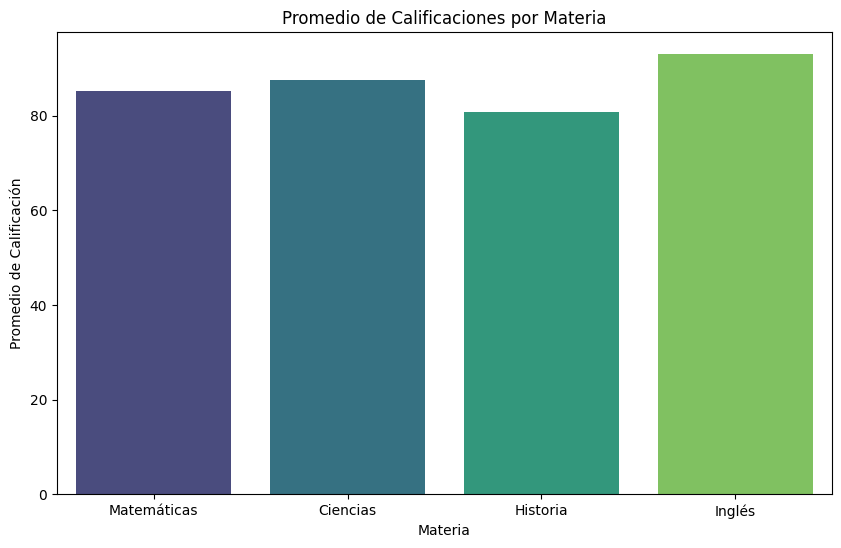

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_materias.index, y=promedio_materias.values, palette='viridis')
plt.xlabel('Materia')
plt.ylabel('Promedio de Calificación')
plt.title('Promedio de Calificaciones por Materia')
plt.show()


In [13]:
promedio_estudiantes = df.groupby('Estudiante')[['Matemáticas', 'Ciencias', 'Historia', 'Inglés']].mean().mean(axis=1).reset_index()
promedio_estudiantes.columns = ['Estudiante', 'Promedio']

C:\Users\Ana Valls\AppData\Local\Temp\ipykernel_18556\91167481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedio_estudiantes, x='Estudiante', y='Promedio', palette='magma')


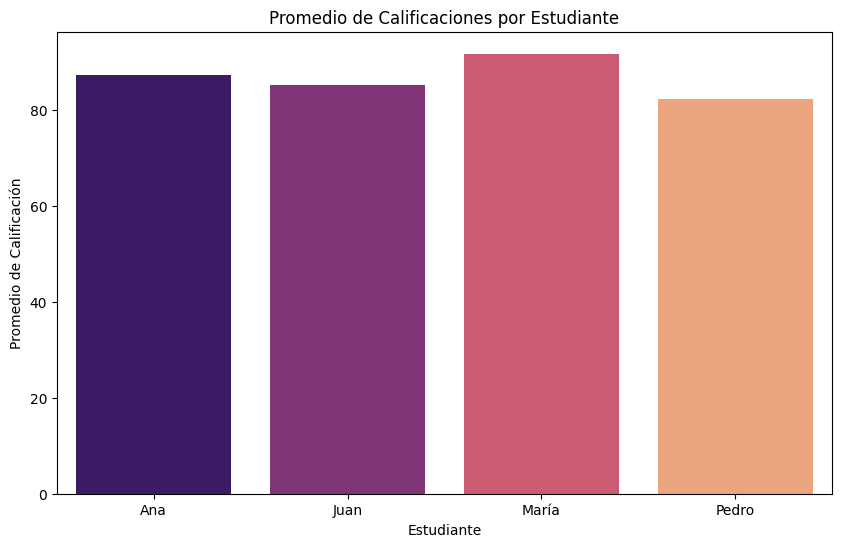

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=promedio_estudiantes, x='Estudiante', y='Promedio', palette='magma')
plt.xlabel('Estudiante')
plt.ylabel('Promedio de Calificación')
plt.title('Promedio de Calificaciones por Estudiante')
plt.show()

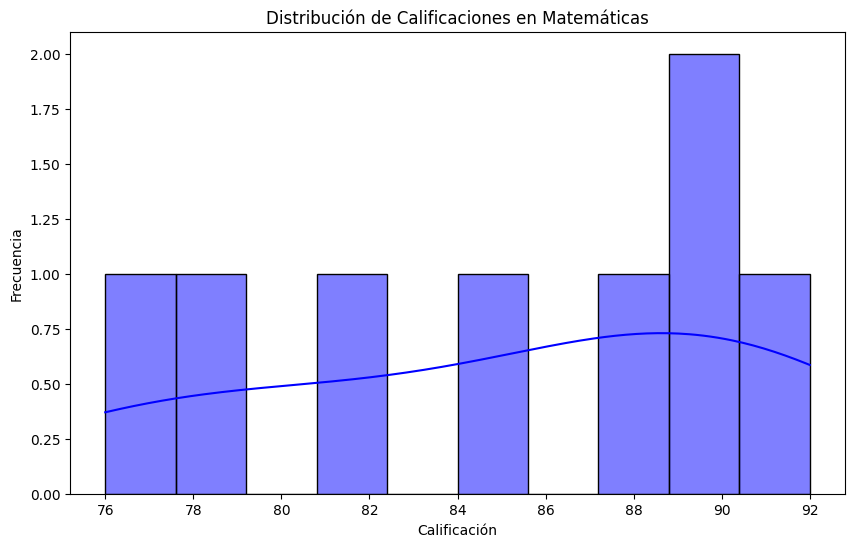

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Matemáticas'], kde=True, color='blue', bins=10)
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Calificaciones en Matemáticas')
plt.show()